In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\ROOPSHREE\Downloads\ibm-hr-analytics-employee-attrition-performance (1)\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

# Data Preprocessing and EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Dividing The Columns Into Two Categories(Continuous and Categorical)

In [7]:
cat = []
con = []
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [8]:
cat_df = df[['Attrition','BusinessTravel','Department','EducationField','Gender','MaritalStatus','Over18','OverTime']]

In [9]:
con_df = df[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating ','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

KeyError: "['PerformanceRating '] not in index"

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_38068\1649782949.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.DistanceFromHome)


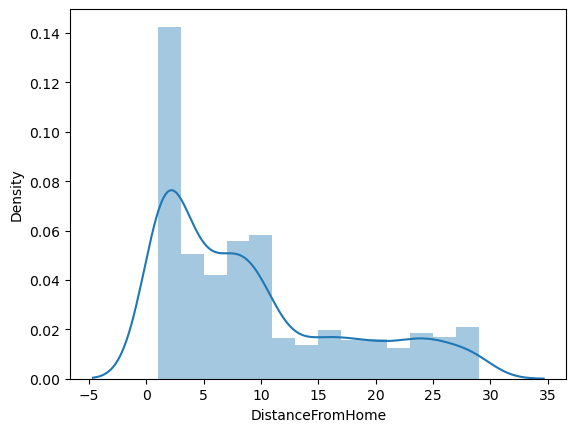

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_38068\1649782949.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.DistanceFromHome_sqrt)


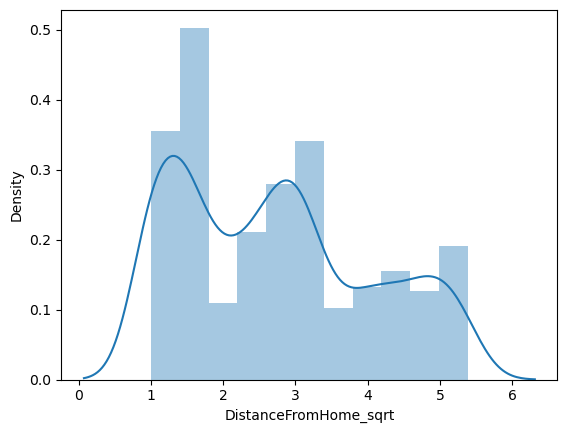

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_38068\1649782949.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.DistanceFromHome_log)


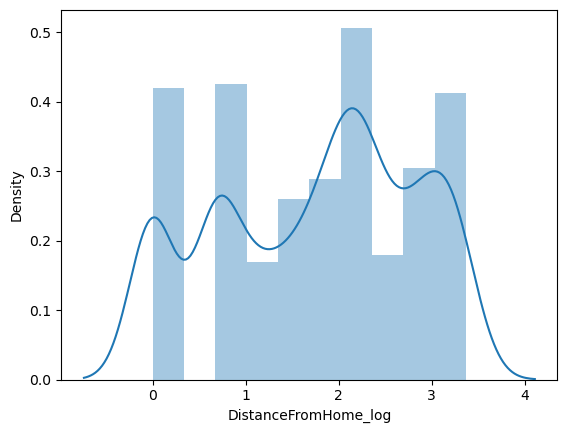

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_38068\1649782949.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.DistanceFromHome_cbrt)


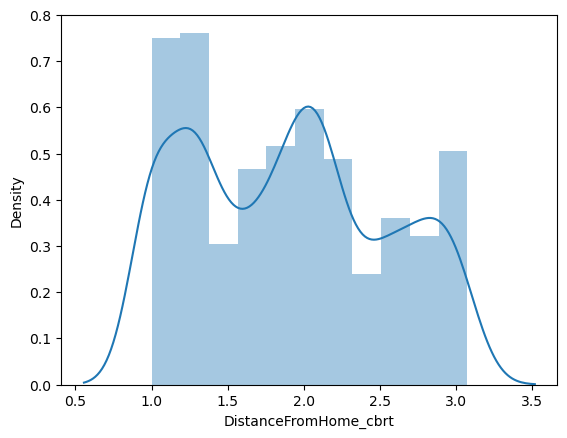

In [13]:
sns.distplot(df.DistanceFromHome)
plt.show()

df['DistanceFromHome_sqrt'] = np.sqrt(df.DistanceFromHome)
sns.distplot(df.DistanceFromHome_sqrt)
plt.show()

df['DistanceFromHome_log']=np.log(df.DistanceFromHome)
sns.distplot(df.DistanceFromHome_log)
plt.show()

df['DistanceFromHome_cbrt']=np.cbrt(df.DistanceFromHome)
sns.distplot(df.DistanceFromHome_cbrt)
plt.show()

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_38068\3691477491.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.PercentSalaryHike)


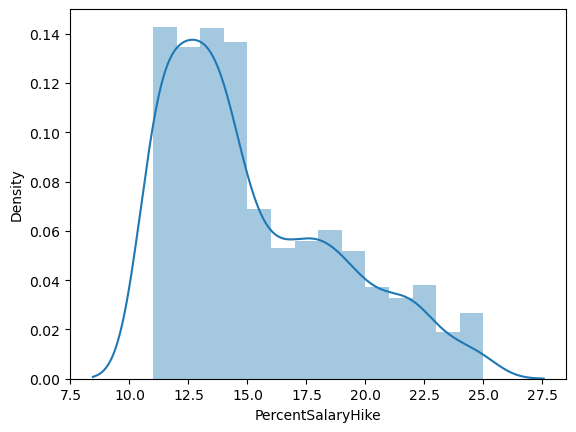

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_38068\3691477491.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.PercentSalaryHike_sqrt)


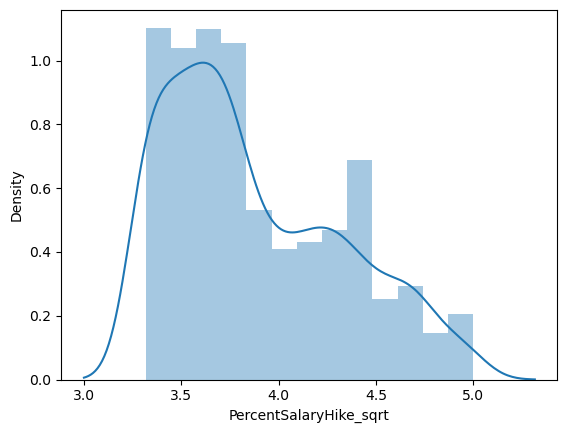

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_38068\3691477491.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.PercentSalaryHike_log)


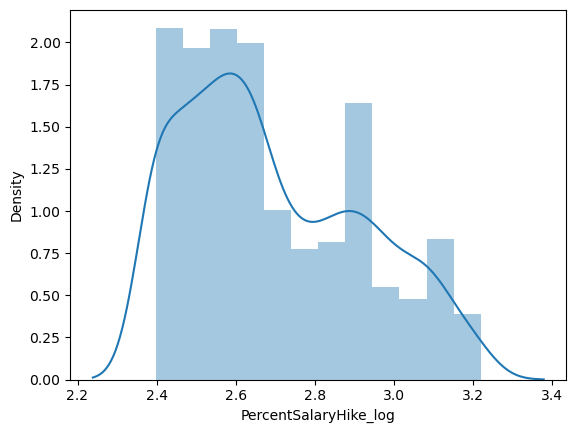

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_38068\3691477491.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.PercentSalaryHike_cbrt)


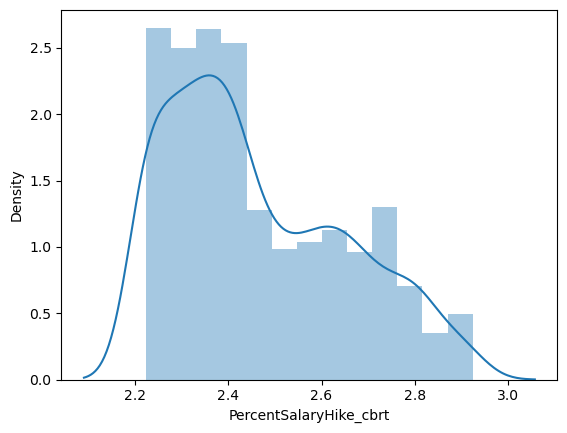

In [14]:
#percentsalaryhike
sns.distplot(df.PercentSalaryHike)
plt.show()

df['PercentSalaryHike_sqrt'] = np.sqrt(df.PercentSalaryHike)
sns.distplot(df.PercentSalaryHike_sqrt)
plt.show()

df['PercentSalaryHike_log']=np.log(df.PercentSalaryHike)
sns.distplot(df.PercentSalaryHike_log)
plt.show()

df['PercentSalaryHike_cbrt']=np.cbrt(df.PercentSalaryHike)
sns.distplot(df.PercentSalaryHike_cbrt)
plt.show()

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_38068\3388947209.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.YearsAtCompany)


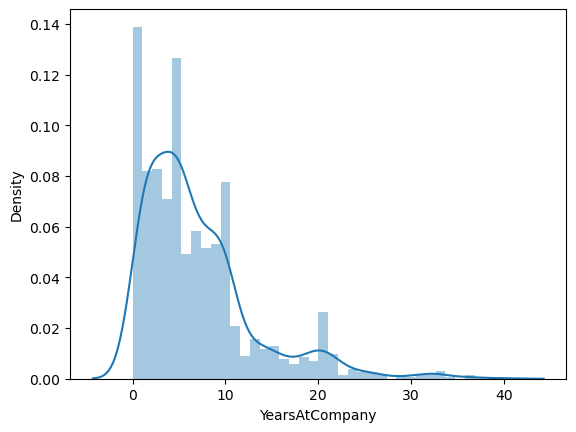

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_38068\3388947209.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.YearsAtCompany_sqrt)


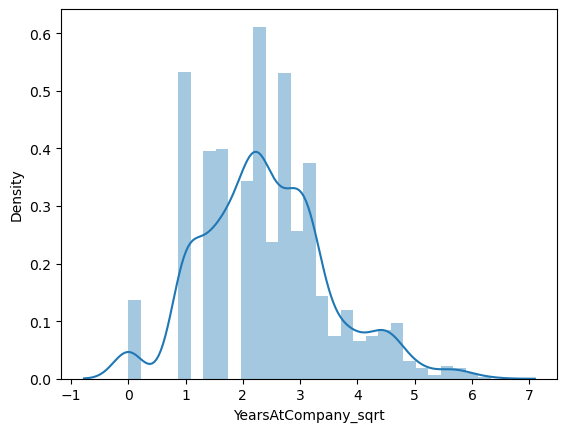

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_38068\3388947209.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.YearsAtCompany_cbrt)


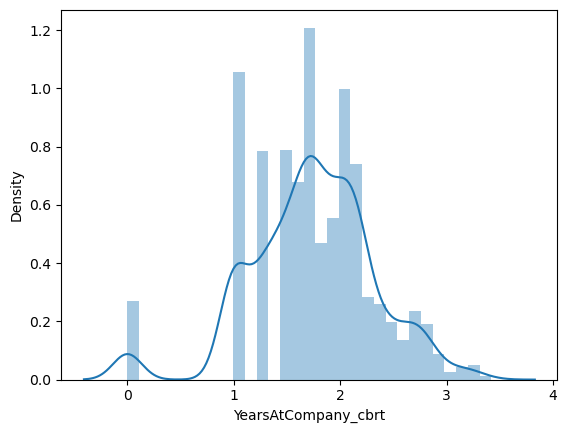

In [16]:
#YearsAtCompany

sns.distplot(df.YearsAtCompany)
plt.show()

df['YearsAtCompany_sqrt'] = np.sqrt(df.YearsAtCompany)
sns.distplot(df.YearsAtCompany_sqrt)
plt.show()


df['YearsAtCompany_cbrt']=np.cbrt(df.YearsAtCompany)
sns.distplot(df.YearsAtCompany_cbrt)
plt.show()

In [18]:
# show how much % of employees left the organization ia as follows:-
df.Attrition.value_counts(normalize = True)
# 16 % of the employees left the company , 84% did not leave the company (Class Imbalance Problem)


No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

<Axes: >

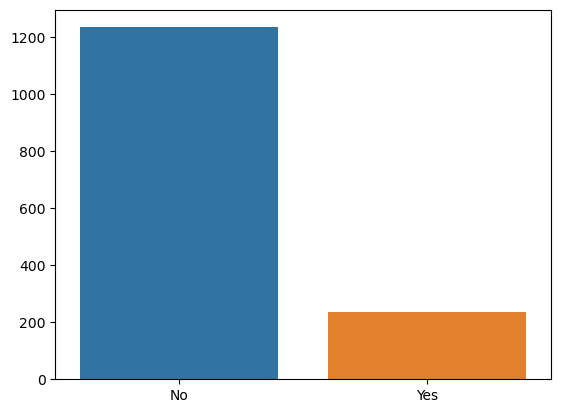

In [20]:
Attrition = df.Attrition.value_counts()
sns.barplot(x=Attrition.index,y=Attrition.values)

<Axes: ylabel='Attrition'>

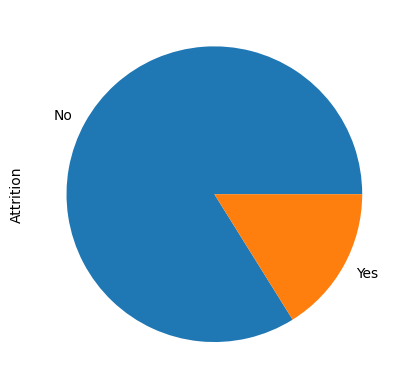

In [21]:
df['Attrition'].value_counts().plot(kind='pie')

In [22]:
df.OverTime.value_counts(normalize=True)

No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64

<Axes: >

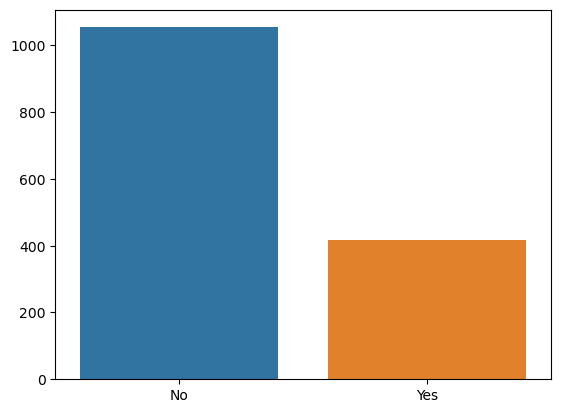

In [23]:
OverTime = df.OverTime.value_counts()
sns.barplot(x=OverTime.index,y=OverTime.values)

# BAR PLOTS

In [24]:
BarPlot_columns=['Age','DistanceFromHome','EducationField','JobInvolvement','JobLevel','JobRole','OverTime','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole']

In [25]:
def Bar_plots(var):
    col=pd.crosstab(df[var],df.Attrition)
    col.div(col.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,figsize=(8,4))
    plt.xticks(rotation=90)

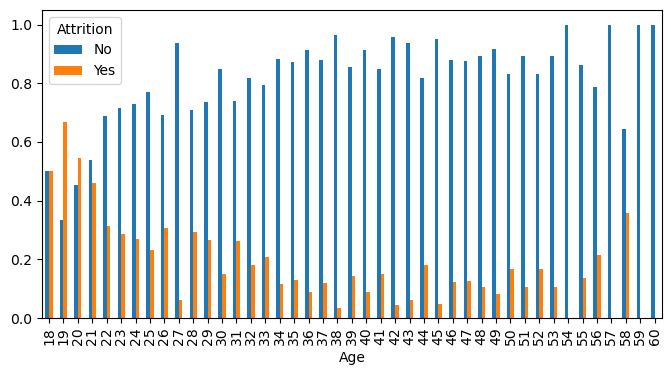

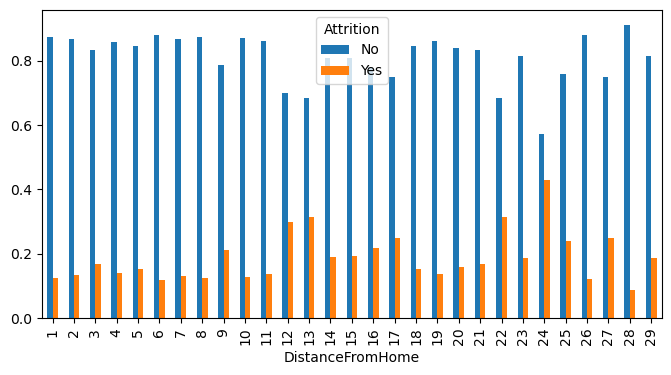

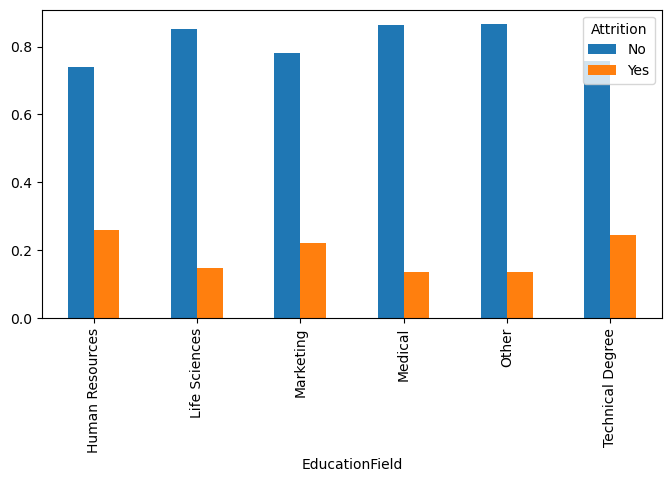

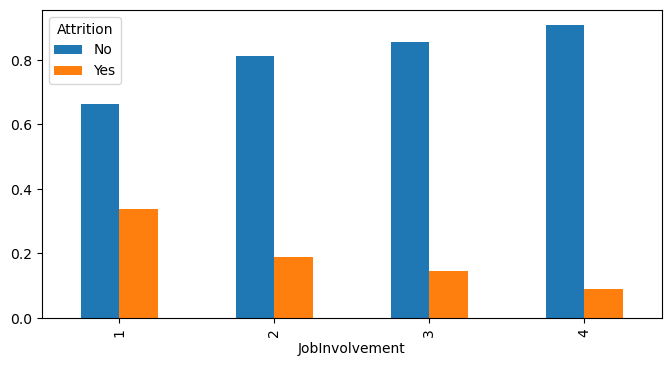

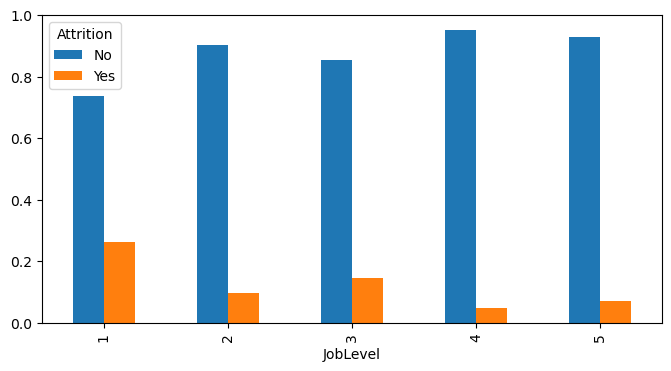

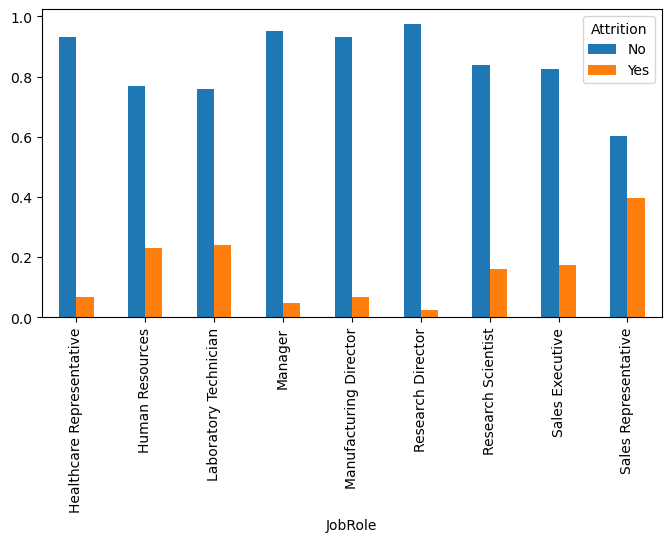

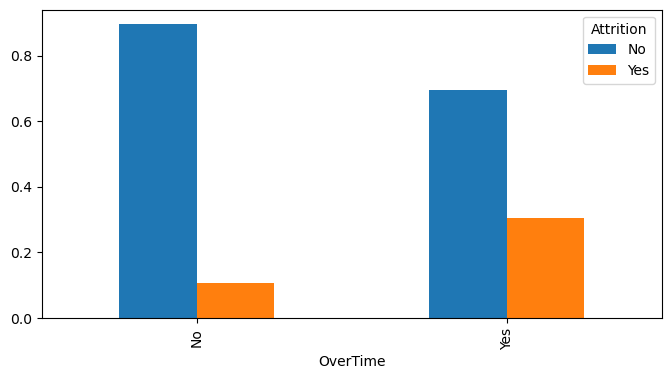

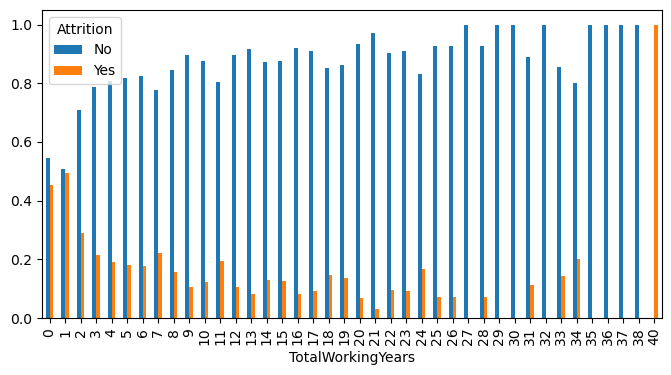

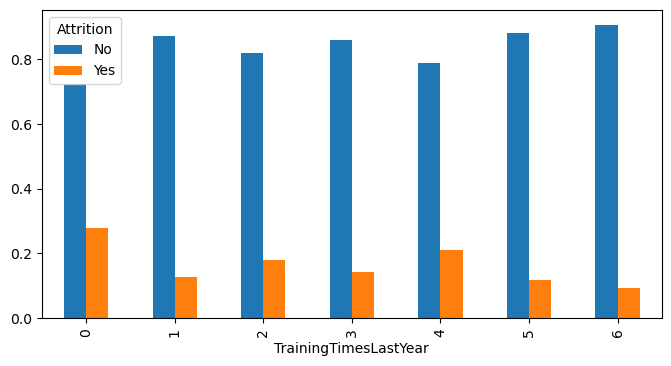

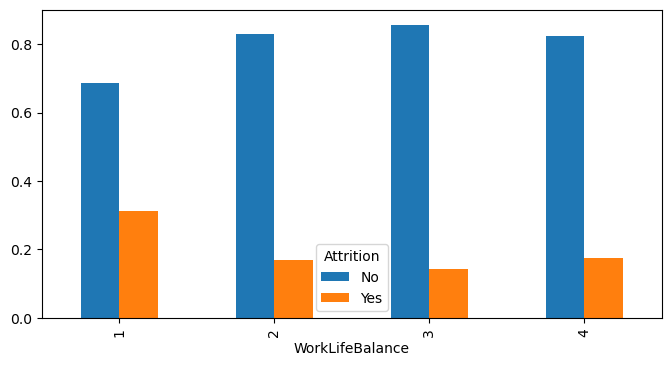

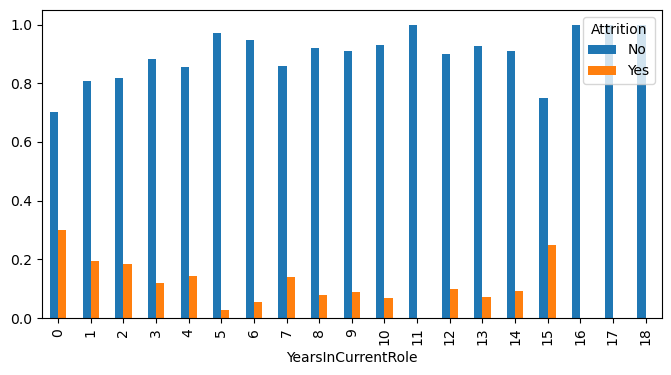

In [26]:
for col in BarPlot_columns:
    Bar_plots(col)

INSIGHTS

# Outlier Detection And Treatment

In [27]:
from scipy import stats

In [28]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DistanceFromHome_sqrt', 'DistanceFromHome_log',
       'DistanceFromHome_cbrt', 'PercentSalaryHike_sqrt',
       'PercentSalaryHike_log', 'PercentSalaryHike_cbrt',
       'YearsAtCompany_sqrt', 'YearsAtCompany_log', 'YearsAtCompany_cbrt'],
      dtype='object')

In [33]:
z = np.abs(stats.zscore(df['Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction','Hourlyrate' ,'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel',
                           'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                           'YearsWithCurrManager']))
print(z)

thresold = 3
print(np.where(z>3))

KeyError: ('Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Hourlyrate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager')